## Question 1 Solution 

In [28]:
import pandas as pd
import seaborn as sns

Importing the data 

In [2]:
data = pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

Understanding the data

In [3]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [7]:
data.shop_id.nunique()

100

Confirming if the orders data is over a 30-day window -

In [12]:
data['created_at'] = pd.to_datetime( data['created_at'])

In [13]:
data['month'] = data['created_at'].dt.month

In [15]:
data['month'].nunique()

1

In [16]:
data['year'] = data['created_at'].dt.year
data['year'].nunique()

1

It is confirmed from above, as the orders from a single month(march) are considered, data is over a 30-day window

Obseving the summary statistics of the data -

In [64]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items,month,year
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.0,5000.0
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,3.0,2017.0
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,0.0,0.0
min,1.000000,1.000000,607.000000,90.000000,1.00000,3.0,2017.0
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,3.0,2017.0
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,3.0,2017.0
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,3.0,2017.0
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,3.0,2017.0


###a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.


From the above statistics, we can observe that order_amount is highly skewed, with min as 90, max as 704000 and standard deviation of 41282.54

To understand this better, we plot the distribution of the order_amount with a box plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


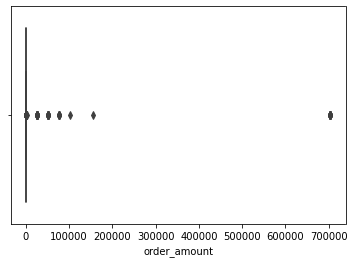

In [31]:
sns.boxplot(data['order_amount'])

Clearly, the presence of outliers is effecting the value of the mean i.e. Average Order Value

Let's take a closer look at what's happening with the orders that have a higher than mean order value - 

In [34]:
data_abvmean = data.loc[data.order_amount >  data.order_amount.mean()]

In [44]:
data_abvmean.groupby(['order_amount','total_items','shop_id','user_id']).size()

order_amount  total_items  shop_id  user_id
25725         1            78       740         1
                                    745         1
                                    800         1
                                    812         1
                                    823         1
                                    852         1
                                    855         1
                                    861         1
                                    866         1
                                    867         1
                                    889         1
                                    890         1
                                    910         1
                                    912         1
                                    944         1
                                    970         1
                                    982         1
                                    990         1
                                    997         1
51450 

As we can see from the above, the exorbitant pricing of the sneakers at shop 78 and bulk purchasing from shop 42 has skewed the average order value. 

### b. What metric would you report for this dataset?

As mean fails to represent the average order value, I am considering median as a metric to represent average order value as median is robust against outliers

In [62]:
data['order_amount'].median()

284.0

### c. What is its value?

The median order value is 284.0 dollars